# 회귀분석 연습문제 (1) 
## 문제 1





In [5]:

import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import os 
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r



In [6]:
df = pd.read_excel("https://data.hossam.kr/E04/beans.xlsx")
df


,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## 탐색적 데이터 분석

### 산점도 그래프


In [7]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

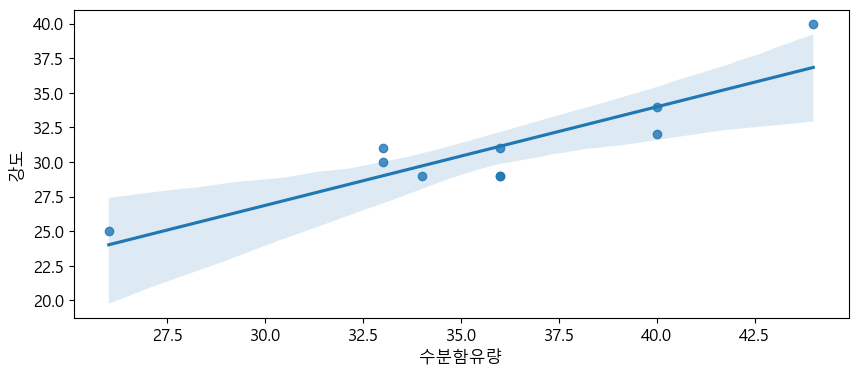

In [10]:
sns.regplot(data=df,x='수분함유량',y='강도')
plt.show()
plt.close()

## 추론통계 

### 1) 상관분석



In [11]:
rdf = pearson_r(df)

In [12]:
rdf

,statistic,pvalue,result
fields,,,
수분함유량vs강도,0.888052,0.000599,True
강도vs수분함유량,0.888052,0.000599,True


상관분석 결과 p값이 0.05보다 작으므로 수분함유량에 따른 강도의 차이가 있는것으로 결론 지을 수 있다.

### 2) 회귀분석

In [15]:
model = ols('강도 ~ 수분함유량',data=df)
fit = model.fit()
fit.summary()


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:16:24   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 분석 결과 해석

R-squared : 0.789
 
 -> 모델의 정확도를 나타내는 지표 -> 강도의 78.9%를 수분함유량이 설명

Adj R-squared  : 0.762 
 
 -> 독립변수가 많아 질수록 과적합 되는 현상을 방지하기 위해 수정된 r값임. 독립변수가 하나기 때문에 해석 x 

F-statistic : 29.85 
 
 -> F값이 29.85로, 유의수준 0.05에서  F(1,8) 보다 크므로 회귀계수가 0이라는 귀무가설을 기각

AIC BIC : 43.23, 43.83
 
 -> 모델의 적합성을 고려하는 지표 낮을수록 좋음

회귀계수 해석 
- 절편 : 5.4991
- 기울기 : 0.7123

기울기의 p값 : 0.001
 
 
-> 회귀계수의 p값이 유의수준 0.05보다 작으므로 통계적으로 유의하다. 

## 결과 보고 

### 모형 적합도 보고

F분포의 파라미터 2개와 그떄의 F값, p값의 유의수준 비교를 명시

수분함유량의 변화에 따른 강도의 변화를 예측하는 회귀분석을 실시한 결과를 확인했고 F검정을 통해 회귀모형에 대한 검정을 한 결과 회귀모형은 통계적으로 유의했다. 
### 독립변수에 대해 보고

수분함유량의 회귀계수는 0.7123으로, 회귀계수에 대한 p 값을 확인한 결과 통계적으로 유의미한 예측변인인 것을 확인했다.